In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df=df.drop('CustomerID', axis=1)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df=df.rename(columns={'Gender':'gender','Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [7]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df1=df.copy()  
df2=df.copy()


In [9]:
df.shape

(200, 4)

In [10]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# **Visualize**

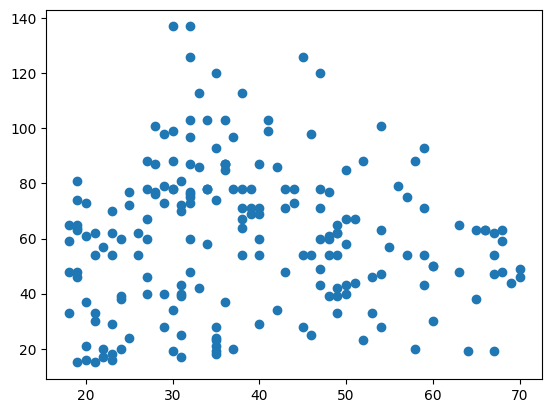

In [11]:
plt.scatter(df.age, df.income)

Text(0.5, 1.0, 'Age and Score plot')

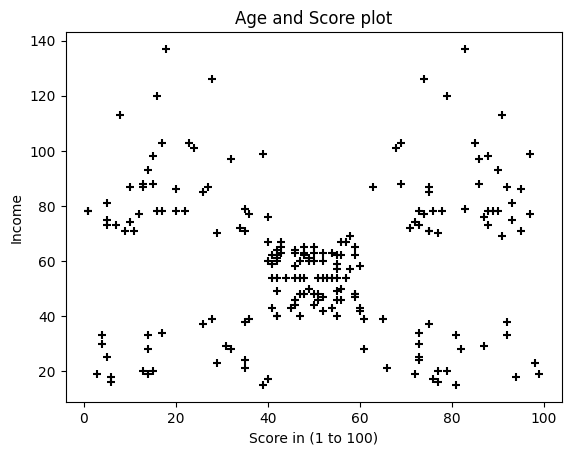

In [12]:
plt.scatter(df.score,df.income,color='black', marker='+') 
plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot')

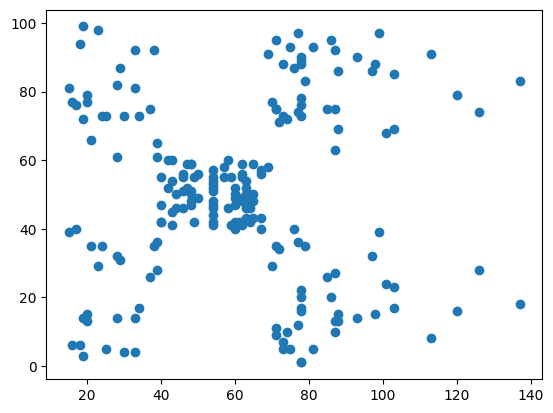

In [13]:
plt.scatter(df.income,df.score)

# **Pairplot**

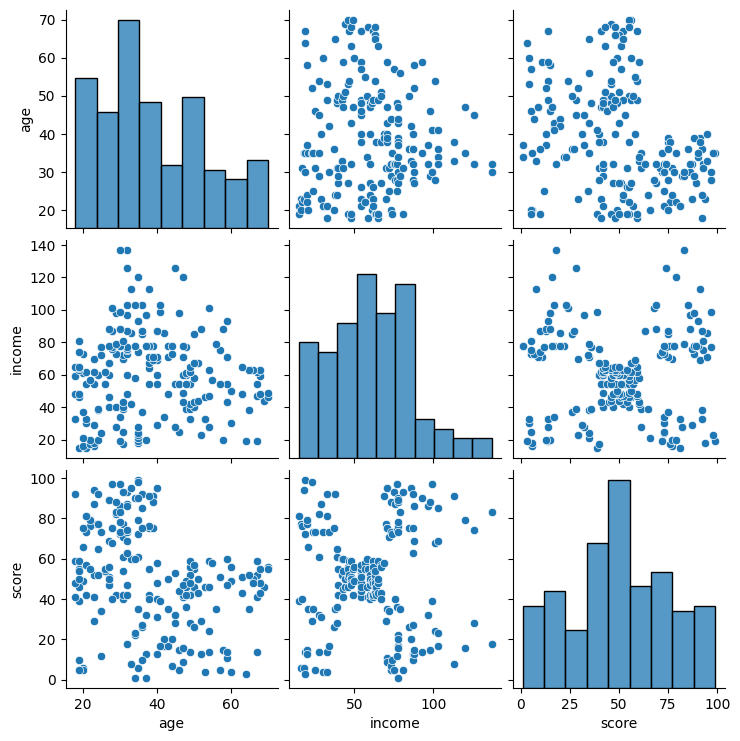

In [14]:
sns.pairplot(df[['age','income','score']])

# **income and score**

Text(0.5, 1.0, 'Age and Score plot')

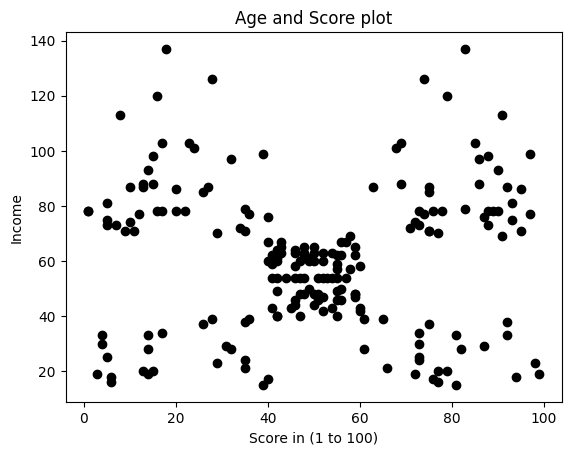

In [15]:
plt.scatter(df.score,df.income,color='black') 
plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot')

# **K-Means Cluster**

In [16]:
from sklearn.cluster import KMeans

In [17]:
km=KMeans(n_clusters=8)

In [18]:
km.fit(df[['score','income']])

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [19]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
km.predict(df[['score','income']])

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 2, 7, 5, 7, 2, 7, 2, 7,
       5, 7, 2, 7, 2, 7, 2, 7, 2, 7, 5, 7, 2, 7, 5, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 7, 2, 7, 5, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 7, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [21]:
df['new_cluster']=km.predict(df[['score','income']])

In [22]:
df.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


# **visualize**

In [23]:
df3=df[df.new_cluster==3]

In [24]:
df3.head()

,gender,age,income,score,new_cluster
0,Male,19,15,39,3
2,Female,20,16,6,3
4,Female,31,17,40,3
6,Female,35,18,6,3
8,Male,64,19,3,3


In [25]:
df3.shape

(21, 5)

Text(0.5, 1.0, 'Age and Score plot')

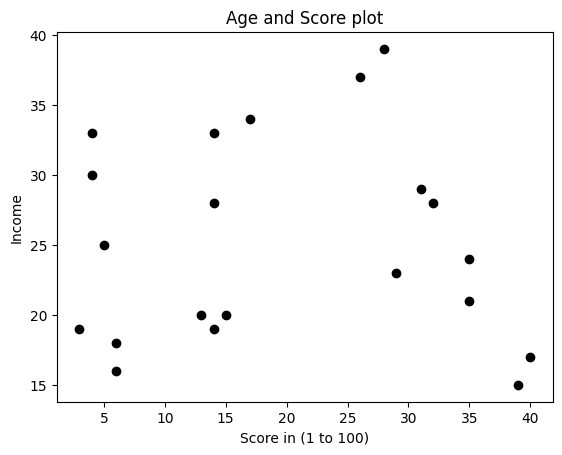

In [26]:
plt.scatter(df3.score,df3.income,color='black') 
plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot')

In [27]:
df4=df[df.new_cluster==4]

In [28]:
df4.head()

,gender,age,income,score,new_cluster
1,Male,21,15,81,4
3,Female,23,16,77,4
5,Female,22,17,76,4
7,Female,23,18,94,4
9,Female,30,19,72,4


In [29]:
df4.shape

(21, 5)

Text(0.5, 1.0, 'Age and Score plot')

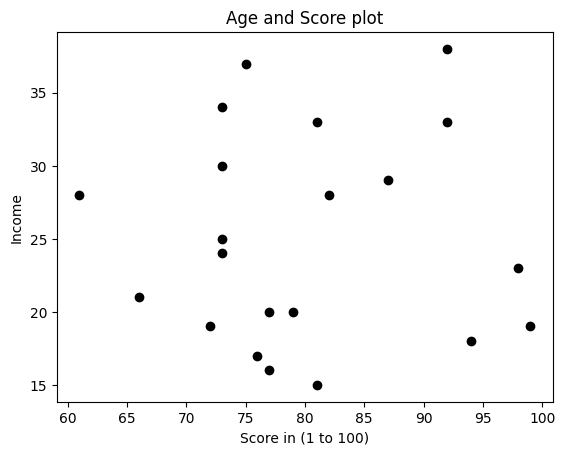

In [30]:
plt.scatter(df4.score,df4.income,color='black') 
plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot')

In [31]:
df0=df[df.new_cluster==0] 
df1=df[df.new_cluster==1] 
df2=df[df.new_cluster==2] 
df3=df[df.new_cluster==3] 
df4=df[df.new_cluster==4] 
df5=df[df.new_cluster==5] 
df6=df[df.new_cluster==6] 
df7=df[df.new_cluster==7]

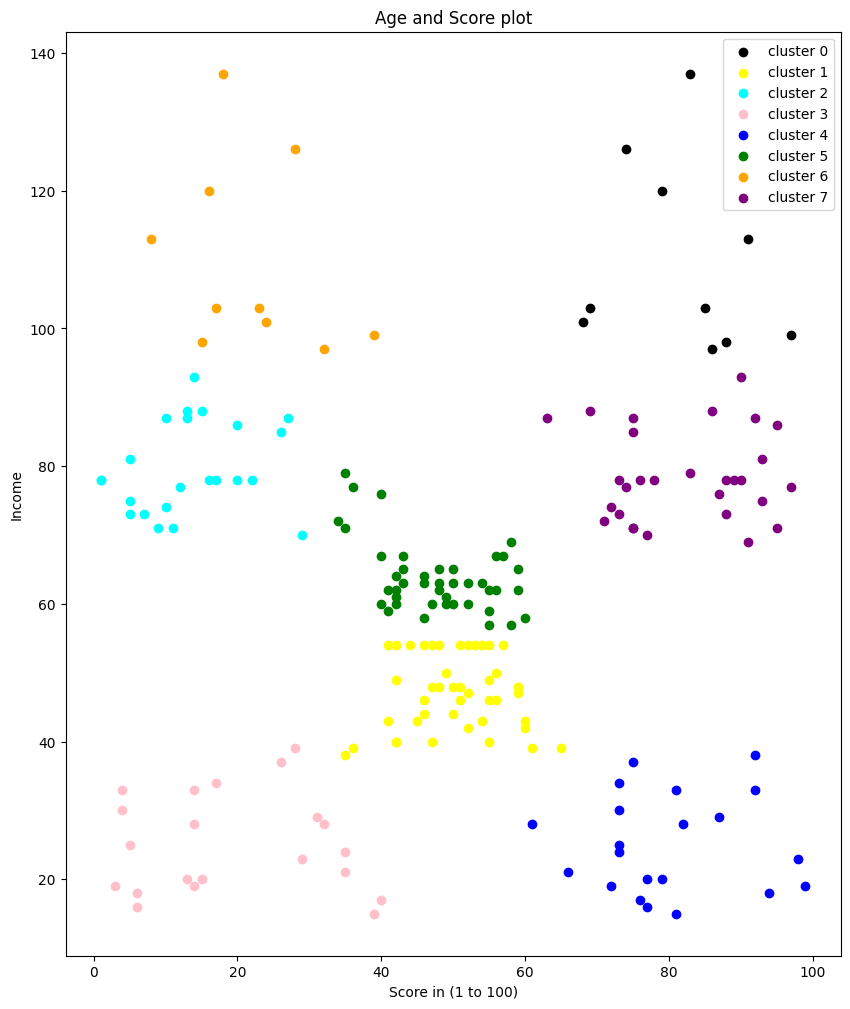

In [35]:
plt.figure(figsize=(10,12)) 

plt.scatter(df0.score,df0.income,color='black',label='cluster 0')  
plt.scatter(df1.score,df1.income,color='yellow',label='cluster 1')  
plt.scatter(df2.score,df2.income,color='cyan',label='cluster 2')  
plt.scatter(df3.score,df3.income,color='pink',label='cluster 3')  
plt.scatter(df4.score,df4.income,color='blue',label='cluster 4')  
plt.scatter(df5.score,df5.income,color='green',label='cluster 5')  
plt.scatter(df6.score,df6.income,color='orange',label='cluster 6') 
plt.scatter(df7.score,df7.income,color='purple',label='cluster 7')  



plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot') 

plt.legend()
 
plt.show()

In [36]:
centre1=km.cluster_centers_

In [37]:
centre1

array([[ 82.        , 109.7       ],
       [ 50.36363636,  47.06818182],
       [ 13.39130435,  79.73913043],
       [ 19.52380952,  25.14285714],
       [ 80.04761905,  25.0952381 ],
       [ 47.66666667,  63.80952381],
       [ 22.        , 109.7       ],
       [ 82.17241379,  78.55172414]])

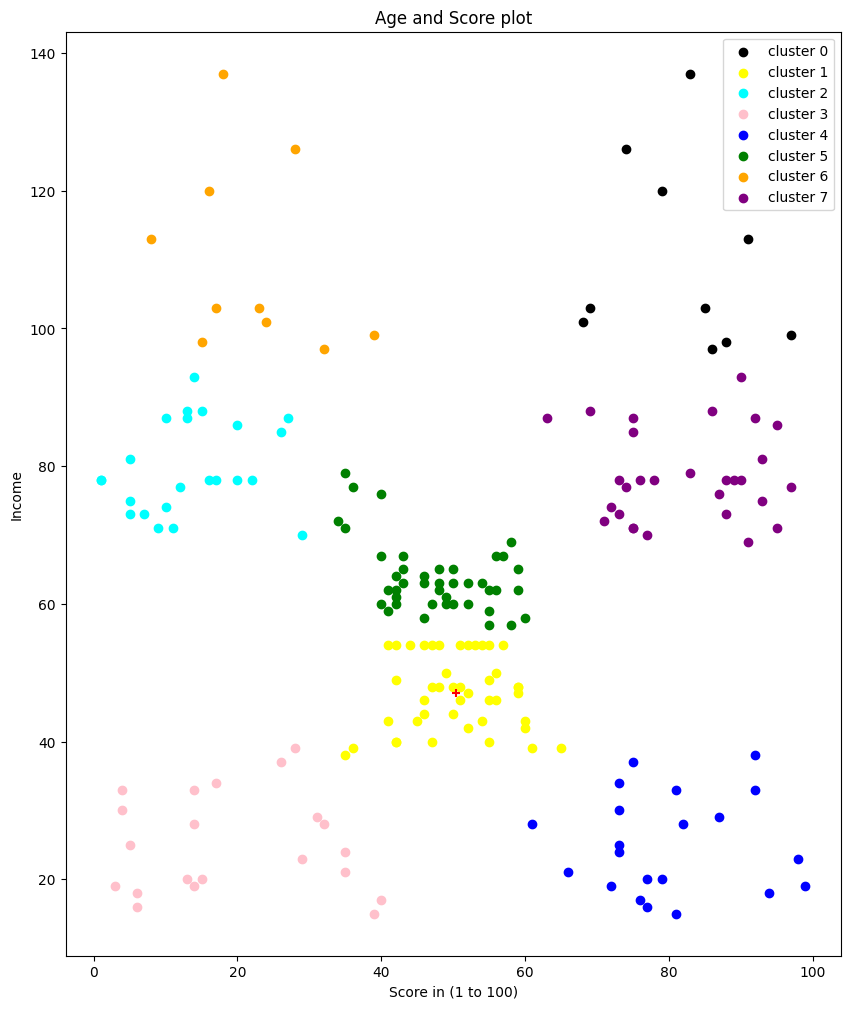

In [38]:
df0=df[df.new_cluster==0] 
df1=df[df.new_cluster==1] 
df2=df[df.new_cluster==2] 
df3=df[df.new_cluster==3] 
df4=df[df.new_cluster==4] 
df5=df[df.new_cluster==5] 
df6=df[df.new_cluster==6] 
df7=df[df.new_cluster==7] 

plt.figure(figsize=(10,12)) 

plt.scatter(df0.score,df0.income,color='black',label='cluster 0')  
plt.scatter(df1.score,df1.income,color='yellow',label='cluster 1')  
plt.scatter(df2.score,df2.income,color='cyan',label='cluster 2')  
plt.scatter(df3.score,df3.income,color='pink',label='cluster 3')  
plt.scatter(df4.score,df4.income,color='blue',label='cluster 4')  
plt.scatter(df5.score,df5.income,color='green',label='cluster 5')  
plt.scatter(df6.score,df6.income,color='orange',label='cluster 6') 
plt.scatter(df7.score,df7.income,color='purple',label='cluster 7')   

plt.scatter(centre1[1,0],centre1[1,1], color='red', marker='+')



plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot') 

plt.legend()
 
plt.show()

# **Optimizing K-Means**

In [40]:
wcss=[] 
cluster_range=range(1,15) 

for k in cluster_range : 
 km2=KMeans(n_clusters=k) 
 km2.fit(df[['income','score']]) 
 wcss.append(km2.inertia_)

In [41]:
wcss

[269981.28,
 183499.07470288622,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 26979.8946033696,
 23711.285028179365,
 21181.204308632543,
 22810.872156376652,
 16484.41094485225,
 14666.959830715881,
 13882.110066833753]

Text(0.5, 0, 'Clusters')

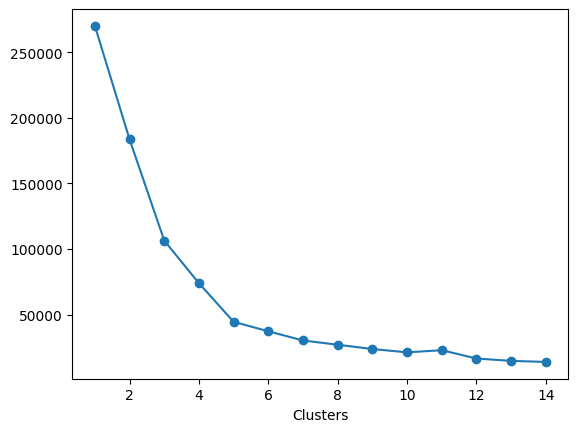

In [45]:
plt.plot(cluster_range,wcss, marker='o' ) 
plt.xlabel('Clusters')

# **By using kneed**

In [46]:
!pip install kneed

In [47]:
from kneed import KneeLocator 
kn=KneeLocator(cluster_range,wcss, curve='convex', direction='decreasing') 

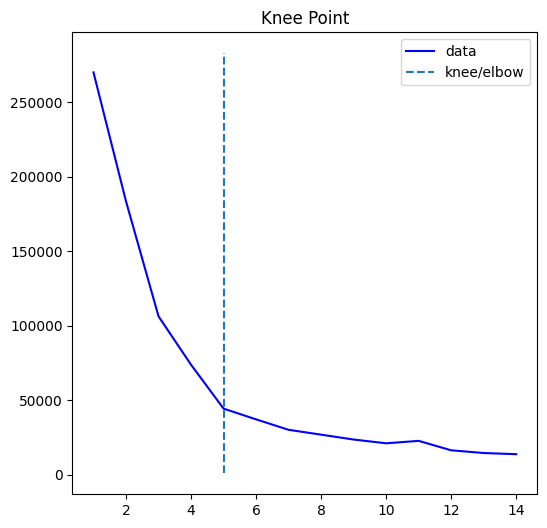

In [49]:
kn.plot_knee()

In [50]:
kn

In [51]:
kn.knee

5

# **After Optimizing**

In [52]:
kn2=KMeans(n_clusters=5) 
kn2.fit(df[['score','income']])

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [53]:
df['optimize_cluster']=kn2.predict(df[['score','income']]) 
df.head()

,gender,age,income,score,new_cluster,optimize_cluster
0,Male,19,15,39,3,3
1,Male,21,15,81,4,1
2,Female,20,16,6,3,3
3,Female,23,16,77,4,1
4,Female,31,17,40,3,3


In [54]:
centre2=kn2.cluster_centers_

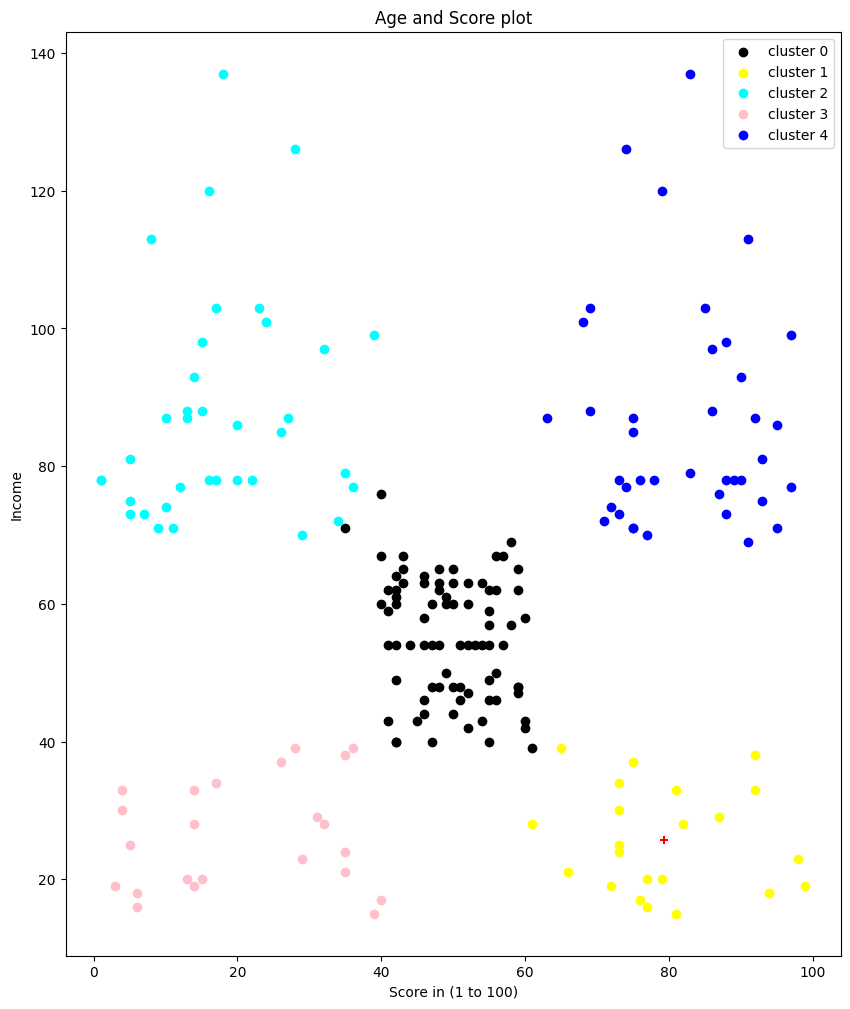

In [55]:
df0=df[df.optimize_cluster==0] 
df1=df[df.optimize_cluster==1] 
df2=df[df.optimize_cluster==2] 
df3=df[df.optimize_cluster==3] 
df4=df[df.optimize_cluster==4] 


plt.figure(figsize=(10,12)) 

plt.scatter(df0.score,df0.income,color='black',label='cluster 0')  
plt.scatter(df1.score,df1.income,color='yellow',label='cluster 1')  
plt.scatter(df2.score,df2.income,color='cyan',label='cluster 2')  
plt.scatter(df3.score,df3.income,color='pink',label='cluster 3')  
plt.scatter(df4.score,df4.income,color='blue',label='cluster 4')  
  

plt.scatter(centre2[1,0],centre2[1,1], color='red', marker='+')



plt.xlabel('Score in (1 to 100)') 
plt.ylabel('Income') 
plt.title('Age and Score plot') 

plt.legend()
 
plt.show()